In [1]:
# SPS Voice Recognition System Training
# For Security Personnel and Administrators

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pickle
import re

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Load and Explore Training Data

In [2]:
import pandas as pd
import os

# Create 'model/' directory if it doesn't exist
os.makedirs("model", exist_ok=True)

# Training data for security personnel and administrators
# voice commands they would use in the field
training_data = [
    # Greetings
    {"text": "Hello", "intent": "greeting"},
    {"text": "Hi", "intent": "greeting"},
    {"text": "Good morning", "intent": "greeting"},
    {"text": "Good afternoon", "intent": "greeting"},
    {"text": "How are you", "intent": "greeting"},
    {"text": "Is anyone there", "intent": "greeting"},
    {"text": "Hey bot", "intent": "greeting"},
    {"text": "Yo", "intent": "greeting"},
    {"text": "Greetings", "intent": "greeting"},
    {"text": "What's up", "intent": "greeting"},

    # Check availability
    {"text": "Check available parking spots", "intent": "check_availability"},
    {"text": "How many spaces are left in main campus", "intent": "check_availability"},
    {"text": "Show me vacancy status", "intent": "check_availability"},
    {"text": "Is student parking full", "intent": "check_availability"},
    {"text": "Check staff parking availability", "intent": "check_availability"},
    {"text": "Parking status for visitor area", "intent": "check_availability"},
    {"text": "Free spots in administration block", "intent": "check_availability"},
    {"text": "Show parking capacity", "intent": "check_availability"},
    {"text": "Are there any spaces left", "intent": "check_availability"},
    {"text": "Current parking occupancy", "intent": "check_availability"},

    # Vehicle tracking
    {"text": "Locate vehicle with plate KBZ123", "intent": "vehicle_status"},
    {"text": "Find car registered to John Smith", "intent": "vehicle_status"},
    {"text": "Where is the red Toyota", "intent": "vehicle_status"},
    {"text": "Check status of vehicle KCA456", "intent": "vehicle_status"},
    {"text": "Find car owner for slot A12", "intent": "vehicle_status"},
    {"text": "Vehicle information for slot B25", "intent": "vehicle_status"},
    {"text": "Registration details for white Mercedes", "intent": "vehicle_status"},
    {"text": "Who owns the car in admin parking spot 5", "intent": "vehicle_status"},
    {"text": "Find student vehicle information", "intent": "vehicle_status"},
    {"text": "Show me permit status for KDG789", "intent": "vehicle_status"},

    # Security alerts
    {"text": "Report suspicious activity in lot B", "intent": "security_alert"},
    {"text": "Security issue at main entrance", "intent": "security_alert"},
    {"text": "Unauthorized vehicle in staff parking", "intent": "security_alert"},
    {"text": "Vehicle without permit in slot C15", "intent": "security_alert"},
    {"text": "Emergency situation in visitor parking", "intent": "security_alert"},
    {"text": "Alert team about parking violation", "intent": "security_alert"},
    {"text": "Vandalism report in student parking", "intent": "security_alert"},
    {"text": "Report blocked emergency exit", "intent": "security_alert"},
    {"text": "Suspicious person in the parking lot", "intent": "security_alert"},
    {"text": "Need backup at west parking entrance", "intent": "security_alert"},

    # Finding empty slots
    {"text": "Find empty spaces in lot A", "intent": "find_empty_slots"},
    {"text": "Show available spots for staff", "intent": "find_empty_slots"},
    {"text": "Direct visitor to parking space", "intent": "find_empty_slots"},
    {"text": "Where should I direct incoming vehicles", "intent": "find_empty_slots"},
    {"text": "Guide student to available spot", "intent": "find_empty_slots"},
    {"text": "Empty spots near library", "intent": "find_empty_slots"},
    {"text": "Available spaces for disabled parking", "intent": "find_empty_slots"},
    {"text": "Find space for faculty member", "intent": "find_empty_slots"},
    {"text": "Show me free spots for VIP", "intent": "find_empty_slots"},
    {"text": "Open spaces in overflow parking", "intent": "find_empty_slots"},

    # Vehicle status
    {"text": "track vehicle KDG789", "intent": "vehicle_status"},
    {"text": "where is vehicle KBZ123", "intent": "vehicle_status"},
    {"text": "show car location", "intent": "vehicle_status"},
    {"text": "find car registered to John Smith", "intent": "vehicle_status"},

    # Thanks and Goodbye
    {"text": "thank you", "intent": "thank_you"},
    {"text": "thanks", "intent": "thank_you"},
    {"text": "goodbye", "intent": "goodbye"},
    {"text": "exit", "intent": "goodbye"},
    
    # Other / Noise
    {"text": "Reset system", "intent": "other_noise"},
    {"text": "System status", "intent": "other_noise"},
    {"text": "Weather forecast", "intent": "other_noise"},
    {"text": "Call extension 4578", "intent": "other_noise"},
    {"text": "What time is it", "intent": "other_noise"},
    {"text": "Change display settings", "intent": "other_noise"},
    {"text": "Send message to team", "intent": "other_noise"},
    {"text": "Can you hear me", "intent": "other_noise"},
    {"text": "Testing microphone", "intent": "other_noise"},
    {"text": "Background noise", "intent": "other_noise"}
]

# Create a DataFrame 
df = pd.DataFrame(training_data)
df.to_csv("model/training_data.csv", index=False)

# Print dataset info
print(f"✅ Dataset loaded with {df.shape[0]} examples across {df['intent'].nunique()} intents.")
df.head()

✅ Dataset loaded with 68 examples across 8 intents.


,text,intent
0,Hello,greeting
1,Hi,greeting
2,Good morning,greeting
3,Good afternoon,greeting
4,How are you,greeting


In [3]:
import pandas as pd
import os

# Updated and expanded training data
expanded_training_data = [
    # Greetings
    *[{"text": t, "intent": "greeting"} for t in [
        "Hello", "Hi", "Good morning", "Good afternoon", "How are you", "Is anyone there",
        "Hey bot", "Yo", "Greetings", "What's up", "Hey", "Hi bot", "Hello assistant"
    ]],

    # Check availability
    *[{"text": t, "intent": "check_availability"} for t in [
        "Check available parking spots", "How many spaces are left in main campus", "Show me vacancy status",
        "Is student parking full", "Check staff parking availability", "Parking status for visitor area",
        "Free spots in administration block", "Show parking capacity", "Are there any spaces left",
        "Current parking occupancy", "Tell current availability", "Do we have space left",
        "Slots open right now", "Is parking available", "Any parking left?", "How full is the lot?"
    ]],

    # Find empty slots
    *[{"text": t, "intent": "find_empty_slots"} for t in [
        "Find empty spaces in lot A", "Show available spots for staff", "Direct visitor to parking space",
        "Where should I direct incoming vehicles", "Guide student to available spot", "Empty spots near library",
        "Available spaces for disabled parking", "Find space for faculty member", "Show me free spots for VIP",
        "Open spaces in overflow parking", "Which slots are empty", "Is slot 4 available",
        "Any open slots", "Many slots open", "Slot empty", "What slots are free?", "List free slots"
    ]],

    # Vehicle status
    *[{"text": t, "intent": "vehicle_status"} for t in [
        "Locate vehicle with plate KBZ123", "Find car registered to John Smith", "Where is the red Toyota",
        "Check status of vehicle KCA456", "Find car owner for slot A12", "Vehicle information for slot B25",
        "Registration details for white Mercedes", "Who owns the car in admin parking spot 5",
        "Find student vehicle information", "Show me permit status for KDG789", "Track vehicle in spot 3",
        "Vehicle info for visitor area", "Where is my car", "Where did I park?", "Track my car"
    ]],

    # Security alert
    *[{"text": t, "intent": "security_alert"} for t in [
        "Report suspicious activity in lot B", "Security issue at main entrance", "Unauthorized vehicle in staff parking",
        "Vehicle without permit in slot C15", "Emergency situation in visitor parking", "Alert team about parking violation",
        "Vandalism report in student parking", "Report blocked emergency exit", "Suspicious person in the parking lot",
        "Need backup at west parking entrance", "Someone is breaking into a car", "Car theft", "Fight in parking lot"
    ]],

    # Reserve slot (new intent)
    *[{"text": t, "intent": "reserve_slot"} for t in [
        "I want to reserve a parking spot", "Book a parking slot", "Reserve space for tomorrow", "How do I reserve a slot?",
        "Can I pre-book a parking space?", "Schedule my parking in advance", "Reserve slot 3 for me", 
        "Is it possible to book parking?", "I need to reserve a space", "Reserve parking for my car", "Can I book a bay?"
    ]],

    # Other/noise
    *[{"text": t, "intent": "other_noise"} for t in [
        "Reset system", "System status", "Weather forecast", "Call extension 4578", "What time is it",
        "Change display settings", "Send message to team", "Can you hear me", "Testing microphone", "Background noise"
    ]]
]

# Convert to DataFrame and write to CSV
df = pd.DataFrame(expanded_training_data)
csv_path = "model/training_data.csv"
df.to_csv(csv_path, index=False)
csv_path if os.path.exists(csv_path) else "Error saving file"


'model/training_data.csv'

In [4]:
import pandas as pd

# Load the saved CSV file
df = pd.read_csv("model/training_data.csv")

# Confirm contents
print(f"✅ Loaded {df.shape[0]} examples across {df['intent'].nunique()} intents.")
df.head()


✅ Loaded 95 examples across 7 intents.


,text,intent
0,Hello,greeting
1,Hi,greeting
2,Good morning,greeting
3,Good afternoon,greeting
4,How are you,greeting


Text Preprocessing

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

df['processed_text'] = df['text'].apply(preprocess_text)
df[['text', 'processed_text', 'intent']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,processed_text,intent
0,Hello,hello,greeting
1,Hi,hi,greeting
2,Good morning,good morning,greeting
3,Good afternoon,good afternoon,greeting
4,How are you,,greeting


Feature Extraction

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = df['processed_text']
y = df['intent']

vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


Train the classifier


In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate the Model

✅ Accuracy: 0.63


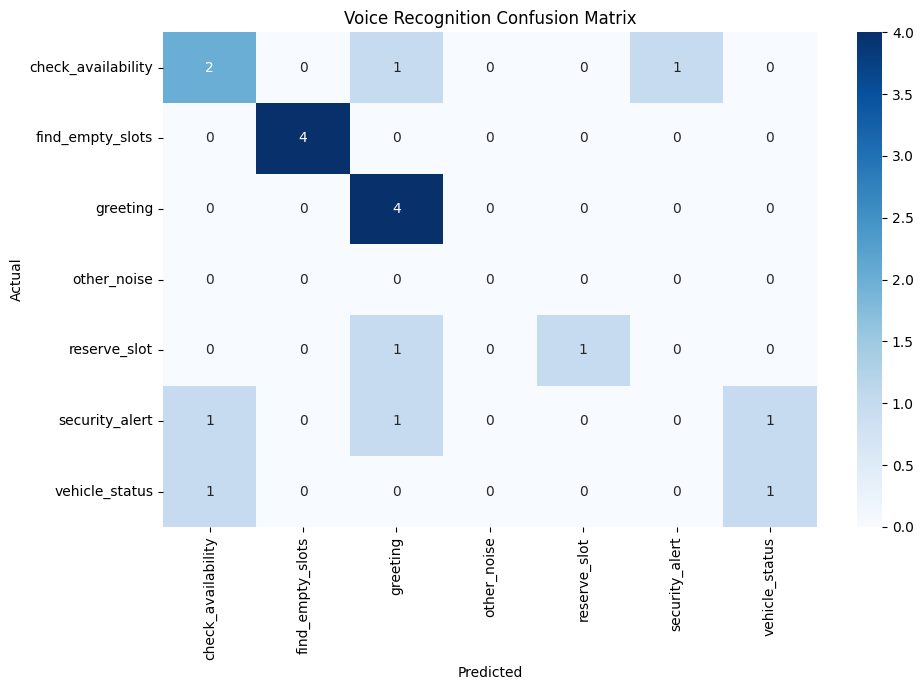


Classification Report:
                    precision    recall  f1-score   support

check_availability       0.50      0.50      0.50         4
  find_empty_slots       1.00      1.00      1.00         4
          greeting       0.57      1.00      0.73         4
      reserve_slot       1.00      0.50      0.67         2
    security_alert       0.00      0.00      0.00         3
    vehicle_status       0.50      0.50      0.50         2

          accuracy                           0.63        19
         macro avg       0.60      0.58      0.57        19
      weighted avg       0.59      0.63      0.59        19



In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.2f}")

# Confusion Matrix
labels = sorted(df['intent'].unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(10, 7))
sns.heatmap(pd.DataFrame(cm, index=labels, columns=labels), annot=True, fmt='d', cmap='Blues')
plt.title("Voice Recognition Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("model/confusion_matrix.png", dpi=300)
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Save model and Vectorizer

In [9]:
import pickle
import os

os.makedirs("model", exist_ok=True)

with open("model/sps_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("model/sps_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ Model and vectorizer saved successfully.")


✅ Model and vectorizer saved successfully.


Predict New Text

In [10]:
def predict_intent(text):
    cleaned = preprocess_text(text)
    features = vectorizer.transform([cleaned])
    prediction = model.predict(features)[0]
    confidence = model.predict_proba(features).max()
    return prediction, confidence

# Try it
sample = "Guide visitor to parking"
intent, conf = predict_intent(sample)
print(f"👉 '{sample}' → {intent} ({conf:.2f} confidence)")

👉 'Guide visitor to parking' → check_availability (0.32 confidence)


Train and Export Final Model 

In [11]:
# Retrain on full dataset and export model
X_full = df['processed_text']
y_full = df['intent']

vectorizer_full = TfidfVectorizer()
X_vec_full = vectorizer_full.fit_transform(X_full)

model_full = RandomForestClassifier(n_estimators=100, random_state=42)
model_full.fit(X_vec_full, y_full)

# Save production version
with open("model/sps_model.pkl", "wb") as f:
    pickle.dump(model_full, f)

with open("model/sps_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer_full, f)

print("✅ Final model and vectorizer retrained on full dataset and saved.")


✅ Final model and vectorizer retrained on full dataset and saved.
